# PROJECT-1: MONTE-CRYPTO

## MAXIMUM PORTFOLIO PERFORMANCE - PRE-COVID AND POST-COVID ANALYSIS  

##### *Cassandra Johnson, Ken Lindgren, Rawad Habib, Antonio Pinkston, Floriane Beyegue, Nigil  Jeyashekar*

### 1.0  INTRODUCTION


Our group analyzed different investments to see which types of investments gave the greatest return over a 5 year horizon (since January 1, 2015), 
and which instruments were projected to give the greatest return in the future. We compared small portfolios of stocks, crypto currency, metals, agricultural commodities, and also an investment in a index fund tied to the S&P500. We also wanted to determine what would be the 'optimal' portfolio mix of all the investments, using the sharpe ratio to optimize risk and return. We also tested if this 'optimal' mix would change when looking at investment performance pre-COVID vs. post-COVID using February 2020 as a cut-off date.

### 2.0  Importing Libraries

In [1]:
import warnings
warnings.simplefilter(action="ignore")
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact 
import hvplot.pandas
import panel as pn
import os
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

!echo %cd%

%cd%


### 2.1 Load .env enviroment variables

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

### 2.1.1 Set Alpaca Key

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### 3.0 Cleaning Data

### 3.1  Defining Path Names for csv Files

In [177]:
BTC_USD_path = Path("Resources/BTC-USD.csv")
ETH_USD_path = Path("Resources/ETH-USD.csv")
LTC_USD_path = Path("Resources/LTC-USD.csv")
Corn_path = Path("Resources/Corn.csv")
Soybeans_path = Path("Resources/Soybean.csv")
Wheat_path = Path("Resources/Wheat.csv")
SPY_path = Path("Resources/SPY.csv")
AMZN_path = Path("Resources/AMZN.csv")
LUV_path = Path("Resources/LUV.csv")
PFE_path = Path("Resources/PFE.csv")
AAPL_path = Path("Resources/AAPL.csv")
Gold_path = Path("Resources/Gold.csv")
Silver_path = Path("Resources/Silver.csv")
Platinum_path = Path("Resources/Platinum.csv")

### 3.2  Defining a Function to Read csv Files as Data Frames
#####  *Sets Date to Required Format. Sets Date as Index. Drops Extraneous Columns and Null Values. Sorts Data Frame by Date.*

In [5]:
def returns(csvpath):
    df=pd.read_csv(csvpath)
    df=df[["Date","Close"]]
    df.set_index(pd.to_datetime(df['Date'], infer_datetime_format=True), inplace=True)
    df.drop(columns=['Date'], inplace=True)
    df_1=df.sort_values(by=['Date'], ascending=True)
    df_new=df_1.dropna()
    return df_new

### 3.3  Checks to Ensure Null Values have been Dropped for all Datasets using the Function

In [6]:
BTC_USD_df=returns(BTC_USD_path)
BTC_USD_df.columns=["BTC"]
BTC_USD_df.isnull().sum()

BTC    0
dtype: int64

In [7]:
ETH_USD_df=returns(ETH_USD_path)
ETH_USD_df.columns=["ETH"]
ETH_USD_df.isnull().sum()

ETH    0
dtype: int64

In [8]:
LTC_USD_df=returns(LTC_USD_path)
LTC_USD_df.columns=["LTC"]
LTC_USD_df.isnull().sum()

LTC    0
dtype: int64

In [9]:
Corn_df=returns(Corn_path)
Corn_df.columns=["Corn"]
Corn_df.isnull().sum()

Corn    0
dtype: int64

In [10]:
Soybeans_df=returns(Soybeans_path)
Soybeans_df.columns=["Soybeans"]
Soybeans_df.isnull().sum()

Soybeans    0
dtype: int64

In [11]:
Wheat_df=returns(Wheat_path)
Wheat_df.columns=["Wheat"]
Wheat_df.isnull().sum()

Wheat    0
dtype: int64

In [12]:
SPY_df=returns(SPY_path)
SPY_df.columns=["SPY"]
SPY_df.isnull().sum()

SPY    0
dtype: int64

In [13]:
AMZN_df=returns(AMZN_path)
AMZN_df.columns=["AMZN"]
AMZN_df.isnull().sum()

AMZN    0
dtype: int64

In [14]:
LUV_df=returns(LUV_path)
LUV_df.columns=["LUV"]
LUV_df.isnull().sum()

LUV    0
dtype: int64

In [15]:
PFE_df=returns(PFE_path)
PFE_df.columns=["PFE"]
PFE_df.isnull().sum()

PFE    0
dtype: int64

In [16]:
AAPL_df=returns(AAPL_path)
AAPL_df.columns=["AAPL"]
AAPL_df.isnull().sum()

AAPL    0
dtype: int64

In [17]:
Gold_df=returns(Gold_path)
Gold_df.columns=["Gold"]
Gold_df.isnull().sum()

Gold    0
dtype: int64

In [18]:
Silver_df=returns(Silver_path)
Silver_df.columns=["Silver"]
Silver_df.isnull().sum()

Silver    0
dtype: int64

In [19]:
Platinum_df=returns(Platinum_path)
Platinum_df.columns=["Platinum"]
Platinum_df.isnull().sum()

Platinum    0
dtype: int64

### 3.4  Printing all the Datasets

In [20]:
SPY_df=SPY_df.pct_change().dropna()
SPY_df.head()

SPY
Date                
2015-01-05 -0.018060
2015-01-06 -0.009419
2015-01-07  0.012461
2015-01-08  0.017745
2015-01-09 -0.008014

In [21]:
crypto_portfolio_data = pd.concat([BTC_USD_df, ETH_USD_df, LTC_USD_df], axis="columns", join="inner")
crypto_portfolio_data = crypto_portfolio_data.pct_change().dropna()
#crypto_portfolio_data.head()

In [22]:
comm_portfolio_data = pd.concat([Corn_df, Soybeans_df, Wheat_df], axis="columns", join="inner")
comm_portfolio_data = comm_portfolio_data.pct_change().dropna()
#comm_portfolio_data

In [23]:
stock_portfolio_data = pd.concat([AMZN_df, LUV_df, PFE_df, AAPL_df], axis="columns", join="inner")
stock_portfolio_data = stock_portfolio_data.pct_change().dropna()
#stock_portfolio_data

In [24]:
metals_portfolio_data = pd.concat([Gold_df, Silver_df, Platinum_df], axis="columns", join="inner")
metals_portfolio_data = metals_portfolio_data.pct_change().dropna()
metals_portfolio_data.head()
#metals_portfolio_data

Gold    Silver  Platinum
Date                                    
2015-01-05  0.016721  0.026291  0.008316
2015-01-06  0.002645  0.021605  0.007010
2015-01-07 -0.000577 -0.000906 -0.001229
2015-01-08 -0.003010 -0.010432 -0.000820
2015-01-09  0.011747  0.009015  0.011490

### 4.0 Plotting Daily and Cumulative Returns

### 4.1 Plotting Portfolio Daily Returns 

In [25]:
#Weight the portfolio evenly between crypto investments.  
weights_3 = [1/3, 1/3, 1/3]
crypto_portfolio_returns = crypto_portfolio_data.dot(weights_3)
crypto_returns_df = pd.DataFrame(crypto_portfolio_returns)
crypto_returns_df.columns=["Crypto"]
crypto_returns_df.head()

Crypto
Date                
2015-08-08 -0.292914
2015-08-09 -0.013747
2015-08-10  0.006640
2015-08-11  0.194347
2015-08-12  0.027796

In [26]:
crypto_returns_df.hvplot(figsize=(20,10), title = "Crypto Portfolio Daily Returns")

:Curve   [Date]   (Crypto)

In [27]:
metals_portfolio_returns = metals_portfolio_data.dot(weights_3)
metals_returns_df = pd.DataFrame(metals_portfolio_returns)
metals_returns_df.columns=["Metals"]
metals_returns_df.head()
metals_returns_df.hvplot(figsize=(20,10), title = "Metals Portfolio Daily Returns")

:Curve   [Date]   (Metals)

In [28]:
comm_portfolio_returns = comm_portfolio_data.dot(weights_3)
comm_returns_df = pd.DataFrame(comm_portfolio_returns)
comm_returns_df.columns=["Agriculture Commodities"]
comm_returns_df.head()
comm_returns_df.hvplot(figsize=(20,10), title = "Agriculture Commodities Portfolio Daily Returns")

:Curve   [Date]   (Agriculture Commodities)

In [29]:
weights_4 = [0.25,0.25,0.25,0.25]
stock_portfolio_returns = stock_portfolio_data.dot(weights_4)
stock_returns_df = pd.DataFrame(stock_portfolio_returns)
stock_returns_df.columns=["Stock Portfolio"]
stock_returns_df.head()
stock_returns_df.hvplot(figsize=(20,10), title = "Stock Portfolio Daily Returns")

:Curve   [Date]   (Stock Portfolio)

In [30]:
SPY_df.hvplot(figsize=(20,10), title = "S&P500 Daily Returns")

:Curve   [Date]   (SPY)

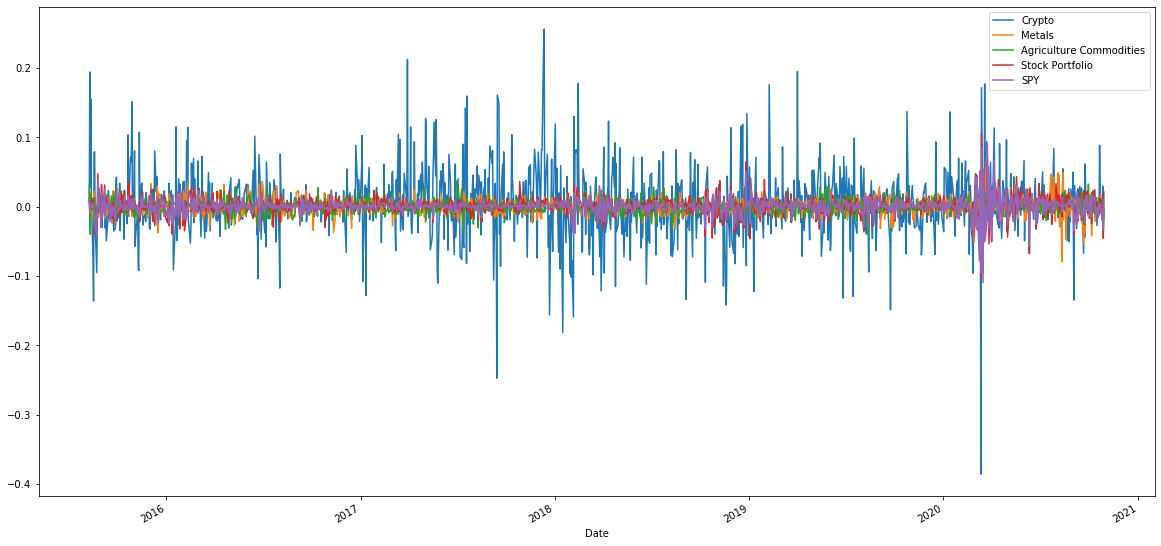

In [31]:
investment_returns_df = pd.concat([crypto_returns_df, metals_returns_df, comm_returns_df, stock_returns_df, SPY_df], axis="columns", join="inner")
investment_returns_df.plot(figsize = (20,10))


### 4.2 Calculating and Plotting Cumulative Returns 

In [97]:
crypto_cumulative_returns = (1 + crypto_returns_df).cumprod() -1
metals_cumulative_returns = (1 + metals_returns_df).cumprod() -1
comm_cumulative_returns = (1 + comm_returns_df).cumprod() -1
stock_cumulative_returns = (1 + stock_returns_df).cumprod() -1
SPY_cumulative_returns = (1 + SPY_df).cumprod() -1

In [98]:
investment_cumulative_df = pd.concat([crypto_cumulative_returns, metals_cumulative_returns, comm_cumulative_returns, stock_cumulative_returns, SPY_cumulative_returns], axis="columns", join="inner")
investment_cumulative_df.rename({'0':"Crypto"})
investment_cumulative_df.hvplot(height = 500, width = 1000, ylabel = "Cumulative Return", xlabel = "Year", title = "Investment Performance Comparison")


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [176]:
investment_cumulative_nocrypto_df = pd.concat([metals_cumulative_returns, comm_cumulative_returns, stock_cumulative_returns, SPY_cumulative_returns], axis="columns", join="inner")
investment_cumulative_nocrypto_df.rename({'0':"Metals"})
investment_cumulative_nocrypto_df.hvplot(height = 500, width = 1000, ylabel = "Cumulative Return", xlabel = "Year", title = "Investment Performance Comparison - Without Cryptocurrency")


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### 4.3 Plotting Cumulative Returns via Dashboard

In [178]:
def crypto_cum_return():
    crypto_return =crypto_cumulative_returns.hvplot(
    title = "Crypto Portfolio Cumulative Returns",
    height = 500,
    width=1000)
    return crypto_return

def metals_cum_return():
    metals_return = metals_cumulative_returns.hvplot(
    title = "Metals Portfolio Cumulative Returns",
    height = 500,
    width=1000)
    return metals_return

def comm_cum_return():
    comm_returns = comm_cumulative_returns.hvplot(
    title = "Agricultural Commodities Portfolio Cumulative Returns", 
    height = 500,
    width = 1000)
    return comm_returns

def stock_cum_return():
    stock_returns = stock_cumulative_returns.hvplot(
    title = "Stock Portfolio Cumulative Returns", 
    height = 500,
    width = 1000)
    return stock_returns

def SPY_cum_return():
    SPY_returns = SPY_cumulative_returns.hvplot(
    title = "S&P500 Cumulative Returns", 
    height = 500,
    width = 1000)
    return SPY_returns

def combined_portfolio_cum_return():
    combined_returns = investment_cumulative_df.hvplot(
    title = "Investment Performance Comparison", 
    height = 500,
    width = 1000)
    return combined_returns

In [179]:
pn.extension()

crypto_column = pn.Column(crypto_cum_return())

metals_column = pn.Column(metals_cum_return())

comm_column = pn.Column(comm_cum_return())

stock_column = pn.Column(stock_cum_return())

SPY_column = pn.Column(SPY_cum_return())

combined_column = pn.Column(combined_portfolio_cum_return())

In [180]:
Dashboard = pn.Tabs(
            ("Cryptocurrency Returns",crypto_column),
            ("Metals Returns",metals_column),
            ("Agricultural Commodities Returns", comm_column),
            ("Stock Returns", stock_column),
            ("S&P 500 Returns",SPY_column),
            ("All Investment Returns", combined_column),
            )
Dashboard.servable()

Tabs
    [0] Column
        [0] HoloViews(Curve)
    [1] Column
        [0] HoloViews(Curve)
    [2] Column
        [0] HoloViews(Curve)
    [3] Column
        [0] HoloViews(Curve)
    [4] Column
        [0] HoloViews(Curve)
    [5] Column
        [0] HoloViews(NdOverlay)

### 5.0 Monte Carlo Simulations

In [139]:
#Initial simulations setup
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-30", tz="America/New_York").isoformat()

# Set the ticker information
comm_tickers = ["CORN", "WEAT", "SOYB"]
stock_tickers = ["AAPL", "AMZN", "LUV", "PFE"]
sp500_ticker = ["SPY"]

### 4.1 Commodities

In [130]:
# Get 5 year's worth of historical price data for Corn, Wheat, and Soybean
comm_df_ticker = api.get_barset(
    comm_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
comm_df_ticker.head()

CORN                                     SOYB  \
                            open   high      low    close  volume    open   
2015-01-02 00:00:00-05:00  26.63  26.71  26.2400  26.4999  121630  20.680   
2015-01-05 00:00:00-05:00  26.85  27.16  26.8500  27.1400  110819  20.650   
2015-01-06 00:00:00-05:00  27.20  27.32  26.8900  27.0700  150495  21.475   
2015-01-07 00:00:00-05:00  27.01  27.05  26.5000  26.5000  107652  21.340   
2015-01-08 00:00:00-05:00  26.50  26.56  26.3001  26.3800   80838  21.410   

                                                              WEAT           \
                              high      low    close volume   open     high   
2015-01-02 00:00:00-05:00  20.6800  20.4500  20.4500  21816  12.74  12.7400   
2015-01-05 00:00:00-05:00  21.2199  20.6500  21.1700  11707  12.72  12.8129   
2015-01-06 00:00:00-05:00  21.4750  21.1800  21.3700  13875  12.75  12.9400   
2015-01-07 00:00:00-05:00  21.4200  21.2328  21.3000  10406  12.73  12.7300   
2015-01-08 00:00:00-05:00  21.4100  21.1101  21.1401  10915  12.40  12.4200   

                                                    
                               low    close volume  
2015-01-02 00:00:00-05:00  12.4000  12.5500  76805  
2015-01-05 00:00:00-05:00  12.6200  12.6500  53508  
2015-01-06 00:00:00-05:00  12.6001  12.7300  38423  
2015-01-07 00:00:00-05:00  12.4700  12.4761  12694  
2015-01-08 00:00:00-05:00  12.2300  12.2300  77050

In [140]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
comm_fiveyear = MCSimulation(
    portfolio_data = comm_df_ticker,
    weights = [.34,.33,.33],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [141]:
# Printing the simulation input data
comm_fiveyear.portfolio_data.head()

CORN                                   \
                            open   high      low    close  volume   
2015-01-02 00:00:00-05:00  26.63  26.71  26.2400  26.4999  121630   
2015-01-05 00:00:00-05:00  26.85  27.16  26.8500  27.1400  110819   
2015-01-06 00:00:00-05:00  27.20  27.32  26.8900  27.0700  150495   
2015-01-07 00:00:00-05:00  27.01  27.05  26.5000  26.5000  107652   
2015-01-08 00:00:00-05:00  26.50  26.56  26.3001  26.3800   80838   

                                          SOYB                             \
                          daily_return    open     high      low    close   
2015-01-02 00:00:00-05:00          NaN  20.680  20.6800  20.4500  20.4500   
2015-01-05 00:00:00-05:00     0.024155  20.650  21.2199  20.6500  21.1700   
2015-01-06 00:00:00-05:00    -0.002579  21.475  21.4750  21.1800  21.3700   
2015-01-07 00:00:00-05:00    -0.021057  21.340  21.4200  21.2328  21.3000   
2015-01-08 00:00:00-05:00    -0.004528  21.410  21.4100  21.1101  21.1401   

                                                WEAT                    \
                          volume daily_return   open     high      low   
2015-01-02 00:00:00-05:00  21816          NaN  12.74  12.7400  12.4000   
2015-01-05 00:00:00-05:00  11707     0.035208  12.72  12.8129  12.6200   
2015-01-06 00:00:00-05:00  13875     0.009447  12.75  12.9400  12.6001   
2015-01-07 00:00:00-05:00  10406    -0.003276  12.73  12.7300  12.4700   
2015-01-08 00:00:00-05:00  10915    -0.007507  12.40  12.4200  12.2300   

                                                        
                             close volume daily_return  
2015-01-02 00:00:00-05:00  12.5500  76805          NaN  
2015-01-05 00:00:00-05:00  12.6500  53508     0.007968  
2015-01-06 00:00:00-05:00  12.7300  38423     0.006324  
2015-01-07 00:00:00-05:00  12.4761  12694    -0.019945  
2015-01-08 00:00:00-05:00  12.2300  77050    -0.019726

In [142]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
comm_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.993558  1.005660  1.004773  0.994821  0.995930  0.999960  0.999373   
2     0.997572  0.999907  1.005367  1.006519  1.002941  1.010918  0.998822   
3     1.005424  0.990275  0.998048  1.009725  1.012129  1.027860  0.998829   
4     1.019371  1.004800  0.992177  1.013116  1.023988  1.040379  1.005231   
...        ...       ...       ...       ...       ...       ...       ...   
1256  0.602323  0.456065  0.496017  0.760061  0.761336  0.886084  0.685032   
1257  0.598349  0.460361  0.489397  0.764345  0.756597  0.886292  0.678472   
1258  0.599569  0.456221  0.486628  0.770917  0.754843  0.876040  0.683376   
1259  0.603696  0.462102  0.486321  0.763716  0.748138  0.875656  0.680938   
1260  0.599596  0.457535  0.481321  0.756722  0.751638  0.864628  0.679444   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.992704  0.996803  0.993508  ...  0.989919  0.978225  1.008764   
2     1.000827  0.995278  0.987801  ...  0.980853  0.982782  1.028262   
3     0.993436  1.000727  0.987394  ...  0.984115  0.977924  1.016981   
4     1.003423  1.010842  0.987688  ...  0.972197  0.994365  1.023643   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.085063  0.740826  1.004569  ...  0.519001  0.642096  0.570321   
1257  1.071264  0.734166  0.995206  ...  0.520735  0.642800  0.564138   
1258  1.069005  0.739711  0.998063  ...  0.521912  0.640999  0.562602   
1259  1.073782  0.732662  0.996988  ...  0.522784  0.641219  0.565291   
1260  1.067226  0.732861  1.003287  ...  0.528432  0.640051  0.565138   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.997705  0.984143  1.005371  0.995108  0.996886  0.987516  1.006571  
2     0.987068  0.982015  1.003698  1.003502  0.998573  0.985846  1.011792  
3     0.981291  0.980441  0.986576  0.991398  0.991433  0.982505  1.015283  
4     0.967601  0.980937  0.987991  1.002071  0.987909  0.977988  1.016794  
...        ...       ...       ...       ...       ...       ...       ...  
1256  0.554113  0.358213  0.554773  0.514565  0.629561  0.719586  0.728775  
1257  0.554772  0.357265  0.553554  0.515425  0.632401  0.717409  0.734731  
1258  0.550691  0.352747  0.555868  0.518621  0.631860  0.725282  0.728111  
1259  0.554606  0.350014  0.559702  0.522493  0.633910  0.722775  0.723299  
1260  0.557793  0.347656  0.555810  0.519509  0.639765  0.722446  0.711507  

[1261 rows x 500 columns]

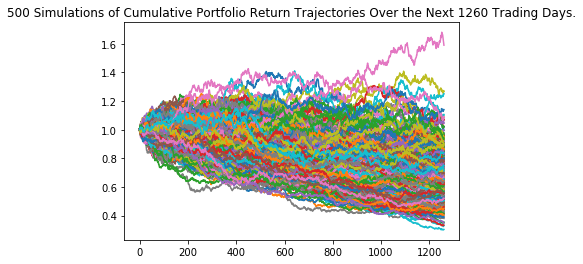

In [143]:
# Plot simulation outcomes
comm_line_plot = comm_fiveyear.plot_simulation()

# Save the plot for future usage
comm_line_plot.get_figure().savefig("Comm_fiveyear_sim_plot.png", bbox_inches="tight")

In [144]:
# Compute summary statistics from the simulated daily returns
comm_simulated_returns_data = {
    "mean": list(comm_fiveyear.simulated_return.mean(axis=1)),
    "median": list(comm_fiveyear.simulated_return.median(axis=1)),
    "min": list(comm_fiveyear.simulated_return.min(axis=1)),
    "max": list(comm_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
comm_df_simulated_returns = pd.DataFrame(comm_simulated_returns_data)

# Display sample data
comm_df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.000133  1.000524  0.978225  1.020001
2  1.000101  1.000526  0.966049  1.030928
3  0.999549  0.999333  0.963096  1.036305
4  0.999057  0.999582  0.946237  1.040379

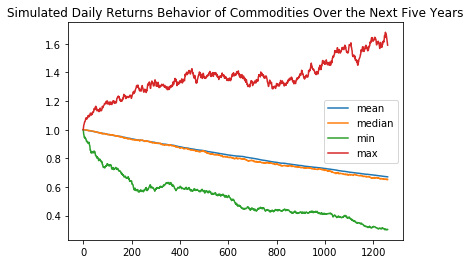

In [145]:
# Use the `plot` function to visually analyze the trajectory of stock daily returns on a 1260 trading day simulation
comm_df_simulated_returns.plot(title="Simulated Daily Returns Behavior of Commodities Over the Next Five Years")

In [146]:
# Set initial investment
comm_initial_investment = 100000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
comm_cumulative_pnl = comm_initial_investment * comm_df_simulated_returns

# Display sample data
comm_cumulative_pnl.head()

mean         median            min            max
0  100000.000000  100000.000000  100000.000000  100000.000000
1  100013.334031  100052.431208   97822.537932  102000.130202
2  100010.065760  100052.648349   96604.902493  103092.812374
3   99954.894438   99933.339533   96309.618088  103630.548494
4   99905.736118   99958.174626   94623.741258  104037.909982

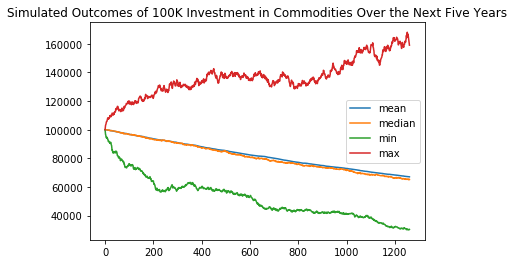

In [147]:
# Use the 'plot' function to create a chart of the simulated profits/losses
comm_cumulative_pnl.plot(title="Simulated Outcomes of 100K Investment in Commodities Over the Next Five Years")

In [148]:
# Fetch summary statistics from the Monte Carlo simulation results
comm_tbl = comm_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(comm_tbl)

count           500.000000
mean              0.670541
std               0.161638
min               0.302966
25%               0.553993
50%               0.651703
75%               0.769925
max               1.590536
95% CI Lower      0.411667
95% CI Upper      1.020008
Name: 1260, dtype: float64


In [149]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
comm_ci_lower = round(comm_tbl[8]*100000,2)
comm_ci_upper = round(comm_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in commodities"
      f" over the next 5 years will end within in the range of"
      f" ${comm_ci_lower} and ${comm_ci_upper}")


There is a 95% chance that an initial investment of $100,000 in commodities over the next 5 years will end within in the range of $41166.71 and $102000.8


### 4.2 Preferred Stock Portfolio 

In [150]:
# Get 5 year's worth of historical price data for Apple (AAPL), Amazon (AMZN), Southwest (LUV), and Pfizer (PFE)
stock_df_ticker = api.get_barset(
    stock_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
stock_df_ticker.head()

AAPL                                       AMZN  \
                             open    high      low   close    volume    open   
2015-01-02 00:00:00-05:00  111.39  111.44  107.350  109.30  47045497  312.58   
2015-01-05 00:00:00-05:00  108.29  108.65  105.410  106.25  50146623  307.01   
2015-01-06 00:00:00-05:00  106.56  107.43  104.630  106.23  59441540  302.24   
2015-01-07 00:00:00-05:00  107.20  108.20  106.695  107.75  34452408  297.50   
2015-01-08 00:00:00-05:00  109.23  112.15  108.700  111.87  50255019  300.32   

                                                                LUV         \
                             high       low   close   volume   open   high   
2015-01-02 00:00:00-05:00  314.75  306.9601  308.52  2238563  42.69  43.05   
2015-01-05 00:00:00-05:00  308.38  300.8500  302.10  2073212  42.83  42.90   
2015-01-06 00:00:00-05:00  303.00  292.3800  295.29  2822127  41.90  42.05   
2015-01-07 00:00:00-05:00  301.28  295.3300  298.42  2058550  40.77  41.12   
2015-01-08 00:00:00-05:00  303.14  296.1100  300.46  2409066  41.00  42.09   

                                                     PFE                       \
                             low   close   volume   open   high    low  close   
2015-01-02 00:00:00-05:00  42.20  42.680  6108290  31.27  31.78  31.22  31.33   
2015-01-05 00:00:00-05:00  41.45  41.655  6557685  31.35  31.41  31.01  31.19   
2015-01-06 00:00:00-05:00  39.67  40.470  9442530  31.27  31.86  31.12  31.45   
2015-01-07 00:00:00-05:00  40.38  40.800  6926002  31.71  31.87  31.58  31.85   
2015-01-08 00:00:00-05:00  40.95  41.840  5916154  32.34  32.64  32.22  32.52   

                                     
                             volume  
2015-01-02 00:00:00-05:00  12666717  
2015-01-05 00:00:00-05:00  18595001  
2015-01-06 00:00:00-05:00  25471105  
2015-01-07 00:00:00-05:00  17183364  
2015-01-08 00:00:00-05:00  38186000

In [151]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
stock_fiveyear = MCSimulation(
    portfolio_data = stock_df_ticker,
    weights = [.25,.25,.25,.25],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [152]:
# Printing the simulation input data
stock_fiveyear.portfolio_data.head()

AAPL                                     \
                             open    high      low   close    volume   
2015-01-02 00:00:00-05:00  111.39  111.44  107.350  109.30  47045497   
2015-01-05 00:00:00-05:00  108.29  108.65  105.410  106.25  50146623   
2015-01-06 00:00:00-05:00  106.56  107.43  104.630  106.23  59441540   
2015-01-07 00:00:00-05:00  107.20  108.20  106.695  107.75  34452408   
2015-01-08 00:00:00-05:00  109.23  112.15  108.700  111.87  50255019   

                                          AMZN                            ...  \
                          daily_return    open    high       low   close  ...   
2015-01-02 00:00:00-05:00          NaN  312.58  314.75  306.9601  308.52  ...   
2015-01-05 00:00:00-05:00    -0.027905  307.01  308.38  300.8500  302.10  ...   
2015-01-06 00:00:00-05:00    -0.000188  302.24  303.00  292.3800  295.29  ...   
2015-01-07 00:00:00-05:00     0.014309  297.50  301.28  295.3300  298.42  ...   
2015-01-08 00:00:00-05:00     0.038237  300.32  303.14  296.1100  300.46  ...   

                             LUV                                  PFE         \
                             low   close   volume daily_return   open   high   
2015-01-02 00:00:00-05:00  42.20  42.680  6108290          NaN  31.27  31.78   
2015-01-05 00:00:00-05:00  41.45  41.655  6557685    -0.024016  31.35  31.41   
2015-01-06 00:00:00-05:00  39.67  40.470  9442530    -0.028448  31.27  31.86   
2015-01-07 00:00:00-05:00  40.38  40.800  6926002     0.008154  31.71  31.87   
2015-01-08 00:00:00-05:00  40.95  41.840  5916154     0.025490  32.34  32.64   

                                                                
                             low  close    volume daily_return  
2015-01-02 00:00:00-05:00  31.22  31.33  12666717          NaN  
2015-01-05 00:00:00-05:00  31.01  31.19  18595001    -0.004469  
2015-01-06 00:00:00-05:00  31.12  31.45  25471105     0.008336  
2015-01-07 00:00:00-05:00  31.58  31.85  17183364     0.012719  
2015-01-08 00:00:00-05:00  32.22  32.52  38186000     0.021036  

[5 rows x 24 columns]

In [153]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
stock_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.009548  1.006332  1.011341  1.005642  0.993413  1.016942  1.019696   
2     0.994902  0.993963  1.010318  1.022982  1.000258  1.016702  1.032606   
3     1.002333  0.993578  1.014881  1.005577  1.014224  1.010692  1.024123   
4     0.990561  1.011323  1.024137  0.992680  1.021451  1.009659  1.033788   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.602414  1.925251  3.670534  4.974156  2.413610  2.372431  2.928203   
1257  1.577611  1.949316  3.654746  4.990748  2.398843  2.354384  2.925603   
1258  1.588217  1.936075  3.615955  5.045517  2.425991  2.330977  2.920320   
1259  1.586934  1.942964  3.622673  4.964160  2.421399  2.326209  2.902385   
1260  1.571236  1.939838  3.659389  4.865999  2.474277  2.368835  2.906285   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.002527  1.006425  0.988058  ...  1.002843  1.024828  1.011184   
2     1.014086  0.995094  0.976282  ...  0.996840  1.024258  1.017801   
3     1.000156  1.000122  0.992108  ...  0.988388  1.022441  1.019438   
4     0.995962  0.982412  1.006307  ...  1.008247  1.017680  1.003397   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.886127  1.630954  1.931212  ...  2.458118  1.915147  4.623799   
1257  1.873005  1.634047  1.912365  ...  2.486252  1.891324  4.644042   
1258  1.890242  1.607525  1.926308  ...  2.482649  1.924204  4.629628   
1259  1.872027  1.626037  1.978470  ...  2.496787  1.920646  4.695491   
1260  1.920763  1.624561  1.980925  ...  2.535725  1.935809  4.679828   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.994801  1.039255  1.000789  0.993526  1.005035  0.985797  0.998631  
2     0.988845  1.021139  1.002383  1.001960  1.012756  0.979774  1.003464  
3     0.996646  1.006591  1.020888  1.002277  0.994805  0.971254  1.007720  
4     1.015825  1.000238  1.020649  0.991833  1.003185  0.979110  1.034623  
...        ...       ...       ...       ...       ...       ...       ...  
1256  3.277895  1.731881  2.336717  0.995761  4.767835  2.046642  1.199484  
1257  3.247827  1.733003  2.362013  1.000072  4.746377  2.025729  1.200239  
1258  3.253463  1.744548  2.397243  1.012307  4.791177  2.005419  1.218573  
1259  3.264325  1.728900  2.391226  1.012709  4.824427  1.981080  1.221569  
1260  3.277235  1.744121  2.371560  1.025643  4.836237  1.990318  1.220080  

[1261 rows x 500 columns]

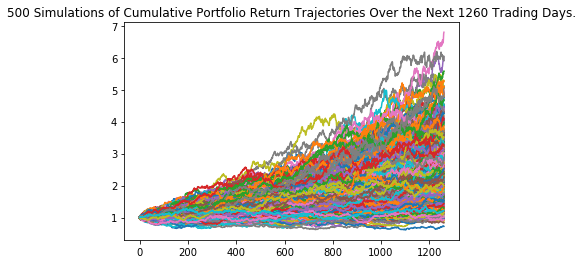

In [154]:
# Plot simulation outcomes
stock_line_plot = stock_fiveyear.plot_simulation()

# Save the plot for future usage
stock_line_plot.get_figure().savefig("Stock_fiveyear_sim_plot.png", bbox_inches="tight")

In [155]:
# Compute summary statistics from the simulated daily returns
stock_simulated_returns_data = {
    "mean": list(stock_fiveyear.simulated_return.mean(axis=1)),
    "median": list(stock_fiveyear.simulated_return.median(axis=1)),
    "min": list(stock_fiveyear.simulated_return.min(axis=1)),
    "max": list(stock_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
stock_df_simulated_returns = pd.DataFrame(stock_simulated_returns_data)

# Display sample data
stock_df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.001138  1.001630  0.970221  1.039255
2  1.001242  1.001147  0.956229  1.038940
3  1.001981  1.000839  0.934203  1.055406
4  1.002069  1.001231  0.946161  1.080128

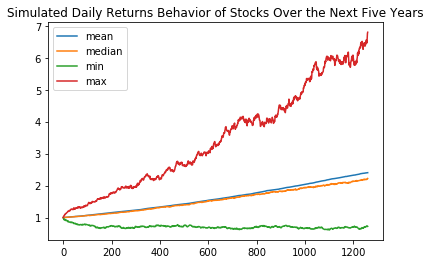

In [156]:
# Use the `plot` function to visually analyze the trajectory of stock daily returns on a 1260 trading day simulation
stock_df_simulated_returns.plot(title="Simulated Daily Returns Behavior of Stocks Over the Next Five Years")

In [157]:
# Set initial investment
stock_initial_investment = 100000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
stock_cumulative_pnl = stock_initial_investment * stock_df_simulated_returns

# Display sample data
stock_cumulative_pnl.head()

mean         median            min            max
0  100000.000000  100000.000000  100000.000000  100000.000000
1  100113.821131  100163.017880   97022.142753  103925.474703
2  100124.195168  100114.739019   95622.932428  103894.015083
3  100198.139769  100083.850072   93420.303748  105540.571731
4  100206.886879  100123.104318   94616.101153  108012.757110

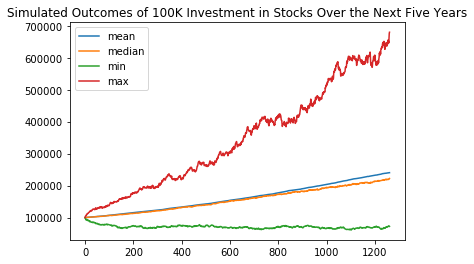

In [165]:
# Use the 'plot' function to create a chart of the simulated profits/losses
stock_cumulative_pnl.plot(title="Simulated Outcomes of 100K Investment in Stocks Over the Next Five Years")

In [166]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_tbl = stock_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(stock_tbl)

count           500.000000
mean              2.404265
std               0.953900
min               0.724985
25%               1.714306
50%               2.222915
75%               2.883902
max               6.795556
95% CI Lower      1.082582
95% CI Upper      4.783693
Name: 1260, dtype: float64


In [167]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000 investments in AAPL stocks
stock_ci_lower = round(stock_tbl[8]*100000,2)
stock_ci_upper = round(stock_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in preferred stock"
      f" over the next year will end within in the range of"
      f" ${stock_ci_lower} and ${stock_ci_upper}.")

There is a 95% chance that an initial investment of $100,000 in preferred stock over the next year will end within in the range of $108258.23 and $478369.25.


### 4.3 S&P 500 Index

In [168]:
# Get 5 year's worth of historical price data for the S&P 500 Index
sp500_df_ticker = api.get_barset(
    sp500_ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
sp500_df_ticker.head()

SPY                                    
                             open    high      low   close     volume
2015-01-02 00:00:00-05:00  206.38  206.88  204.180  205.41   94506045
2015-01-05 00:00:00-05:00  204.17  204.37  201.350  201.80  133100354
2015-01-06 00:00:00-05:00  202.09  202.72  198.855  199.82  166955423
2015-01-07 00:00:00-05:00  201.42  202.72  200.880  202.34  103285826
2015-01-08 00:00:00-05:00  204.00  206.16  203.990  205.92  112316394

In [169]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
sp500_fiveyear = MCSimulation(
    portfolio_data = sp500_df_ticker,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [170]:
# Printing the simulation input data
sp500_fiveyear.portfolio_data.head()

SPY                                      \
                             open    high      low   close     volume   
2015-01-02 00:00:00-05:00  206.38  206.88  204.180  205.41   94506045   
2015-01-05 00:00:00-05:00  204.17  204.37  201.350  201.80  133100354   
2015-01-06 00:00:00-05:00  202.09  202.72  198.855  199.82  166955423   
2015-01-07 00:00:00-05:00  201.42  202.72  200.880  202.34  103285826   
2015-01-08 00:00:00-05:00  204.00  206.16  203.990  205.92  112316394   

                                        
                          daily_return  
2015-01-02 00:00:00-05:00          NaN  
2015-01-05 00:00:00-05:00    -0.017575  
2015-01-06 00:00:00-05:00    -0.009812  
2015-01-07 00:00:00-05:00     0.012611  
2015-01-08 00:00:00-05:00     0.017693

In [171]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
sp500_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.007901  1.017942  0.987119  1.000965  1.017302  0.987847  0.998690   
2     1.001747  1.048054  0.979973  1.005301  1.032278  0.993978  1.003573   
3     1.015007  1.029883  0.985131  1.001725  1.027258  0.994863  1.013627   
4     1.015839  1.020849  0.964629  0.996937  1.035129  1.003547  1.018192   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.837925  2.543171  1.346383  1.438750  1.252454  1.345287  3.092657   
1257  1.869816  2.602101  1.394995  1.430273  1.230501  1.368226  3.084064   
1258  1.873466  2.657528  1.397669  1.424253  1.220695  1.340114  3.072130   
1259  1.895821  2.664042  1.403384  1.411084  1.215061  1.346212  3.084510   
1260  1.891132  2.667711  1.400642  1.417682  1.225597  1.325793  3.071924   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.009060  1.017677  1.002525  ...  0.997851  1.015147  0.973886   
2     1.049357  1.015115  1.000435  ...  0.989770  1.004019  0.981936   
3     1.042439  1.012516  1.003141  ...  0.980341  1.004548  0.986052   
4     1.038127  1.020269  1.002523  ...  0.991247  1.012457  0.976074   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.944078  1.721325  1.756581  ...  1.056906  1.053894  1.862162   
1257  1.921876  1.719546  1.775635  ...  1.070463  1.048114  1.890235   
1258  1.956822  1.744020  1.784970  ...  1.074500  1.071170  1.909256   
1259  1.921468  1.727521  1.771887  ...  1.072505  1.093110  1.931271   
1260  1.940608  1.739955  1.787696  ...  1.066860  1.082683  1.912170   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.997761  1.004668  1.002392  0.994105  0.977042  0.995383  0.997328  
2     1.002332  1.030989  0.998124  0.988327  0.963644  0.981203  0.997597  
3     1.015672  1.026279  0.981374  0.985309  0.965360  0.987859  0.995286  
4     1.004361  1.009847  0.963147  0.977290  0.961273  0.984474  0.992893  
...        ...       ...       ...       ...       ...       ...       ...  
1256  0.993524  1.338500  1.405462  1.843316  1.250030  0.582758  1.405610  
1257  0.964952  1.338278  1.383465  1.825335  1.240123  0.583872  1.405039  
1258  0.961716  1.321950  1.380735  1.806024  1.264871  0.588680  1.413730  
1259  0.962067  1.339456  1.376462  1.773245  1.281134  0.598173  1.453107  
1260  0.949249  1.351756  1.351266  1.787149  1.282060  0.620114  1.449581  

[1261 rows x 500 columns]

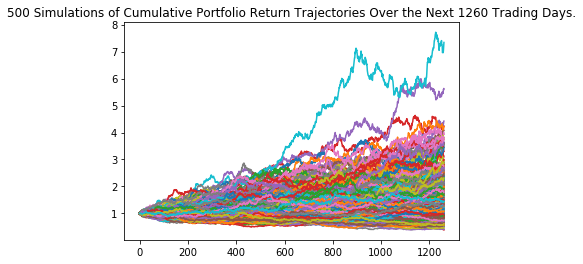

In [172]:
# Plot simulation outcomes
sp500_line_plot = sp500_fiveyear.plot_simulation()

# Save the plot for future usage
sp500_line_plot.get_figure().savefig("S&P500 Index_fiveyear_sim_plot.png", bbox_inches="tight")

In [65]:
# Compute summary statistics from the simulated daily returns
sp500_simulated_returns_data = {
    "mean": list(stock_fiveyear.simulated_return.mean(axis=1)),
    "median": list(stock_fiveyear.simulated_return.median(axis=1)),
    "min": list(stock_fiveyear.simulated_return.min(axis=1)),
    "max": list(stock_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
sp500_df_simulated_returns = pd.DataFrame(stock_simulated_returns_data)

# Display sample data
sp500_df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.000271  0.999384  0.965416  1.037843
2  1.000477  0.999291  0.955953  1.053797
3  1.000563  1.000465  0.947691  1.060248
4  1.001941  1.002103  0.938133  1.062485

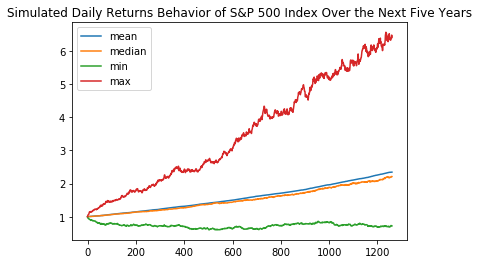

In [66]:
# Use the `plot` function to visually analyze the trajectory of stock daily returns on a 1260 trading day simulation
sp500_df_simulated_returns.plot(title="Simulated Daily Returns Behavior of S&P 500 Index Over the Next Five Years")

In [67]:
# Set initial investment
sp500_initial_investment = 100000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
sp500_cumulative_pnl = sp500_initial_investment * sp500_df_simulated_returns

# Display sample data
sp500_cumulative_pnl.head()

mean         median            min            max
0  100000.000000  100000.000000  100000.000000  100000.000000
1  100027.137187   99938.367553   96541.628518  103784.341990
2  100047.672316   99929.127092   95595.295530  105379.722322
3  100056.281043  100046.471810   94769.117486  106024.752065
4  100194.115106  100210.347451   93813.251175  106248.511905

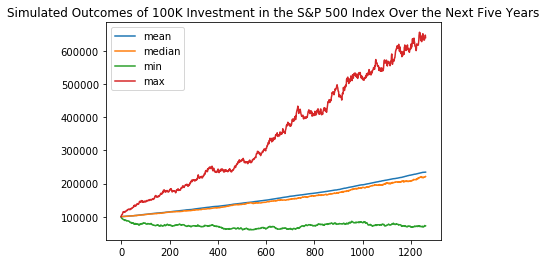

In [68]:
# Use the 'plot' function to create a chart of the simulated profits/losses
sp500_cumulative_pnl.plot(title="Simulated Outcomes of 100K Investment in the S&P 500 Index Over the Next Five Years")

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
sp500_tbl = sp500_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(sp500_tbl)

count           500.000000
mean              1.584827
std               0.642149
min               0.378188
25%               1.145425
50%               1.491501
75%               1.968226
max               3.918790
95% CI Lower      0.640736
95% CI Upper      3.105435
Name: 1260, dtype: float64


In [71]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000 investments in AAPL stocks
sp500_ci_lower = round(sp500_tbl[8]*100000,2)
sp500_ci_upper = round(sp500_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in the S&P 500 Index"
      f" over the next year will end within in the range of"
      f" ${sp500_ci_lower} and ${sp500_ci_upper}.")

There is a 95% chance that an initial investment of $100,000 in the S&P 500 Index over the next year will end within in the range of $64073.56 and $310543.53.
